<img src="../figuras/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Open Quantum Systems
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\tr}{{\rm Tr}\,} $
$ \newcommand{\Tr}{{\rm Tr}\,} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\Lin}{\hbox{Lin}}$

In [2]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

<a id='top'></a>

- [Quantum Operations](#quant_op) 
    
    - [Quantum Operations](#quant_op2)    
    - [Open systems](#open_sys)
<br>

- [Noisy channels](#noisy_chan)

    - [Bit Flip](#bf_chan)
    
    - [Phase Flip](#pf_chan)
    
    - [Depolarizing](#dep_chan)
    
    - [Amplitude damping](#amp_chan)

    - [The Lindblad equation](#lindblad)

<a id='quant_op'></a>

# Quantum operations

## Introduction

In the original formulation of Quantum Mechanics we were used to describe the evolution of a quantum system by means of a time dependent vector $\ket{\psi(t)}$. 

The evolution in time of a pure state is one of two kinds



- **Unitary evolution** of an isolated system

This follows from Axiom II, which postulates the deterministic evolution of a quantum system whose dynamics is governed by a hamiltonian $H$

$$
i\hbar \frac{d}{dt}\ket{\psi(t)} = H \ket{\psi(t)}
$$

The solution preserves the norm, and can be seen as the application of a unitary evolution operator 

$$
\ket{\psi(t)} = U(t,0) \ket{\psi(0)}
$$
to the initial state $\ket{\psi(0)}$.




- **Projective Measurement** 

This is an abrupt change 
$$
\ket{\psi} \to \ket{\lambda_i} = \frac{P_i\ket{\psi}}{|P_i\ket{\psi}|}
$$

where $P_i$ is a projector onto some eigenspace of a given obervable $A = \sum_i \lambda_i P_i$
This *abrupt* change is random and occurs with 
probability

$$
p_i = \bra{\psi}P_i^\dagger P_i \ket{\psi}
$$

This change cannot be seen as the application of a unitary operation, as the rescaling needed depends on the state.

We have learned how to combine quantum with classical uncertainties by means of the density matrix formalism. 

The two previous statements have a counterpart in this generalized formalism of quantum mechanics.


- **Unitary evolution** of an isolated system

This follows from Axiom II, which postulates the deterministic evolution of a quantum system whose dynamics is governed by a hamiltonian $H$

$$
i\hbar \frac{d}{dt} \rho(t) = [H, \rho(t)]
$$

The solution preserves the norm, and can be seen as the application of a unitary operator 

$$
\rho(t) = U(t,0) \rho(0)U(t,0)^\dagger
$$
to the initial state $\rho(0)$





- **Projetive Measurement** 

This is an abrupt change 
$$
\rho \to \rho_i =  \frac{P_i\rho P_i^\dagger}{p_i}
$$

where $P_i$ a measuring projector. This *abrupt* change is random and occurs with 
probability

$$
p_i = \Tr(P_i^\dagger P_i \rho)
$$

The normalizing denominator $p_i$ depends on $\rho$, hence it is essential to make $\rho'$ a density matrix. However it prevents the measurement to be seen as a linear map. 

<a id='quant_op2'></a>
## Quantum operation

The density matrix formalism allows to embedd the two changes we have studied into a wider class of maps

$$\rho \to \rho' = {\cal E}(\rho)$$

This will allow to study more general processes like open system dynamics and decoherence



In a rather restricted form we will term <i>quantum operation</i> a *linear map* (also named *superoperator*) that maps density operators to density operators. This will demand that the trace is preserved in its unit value, as well as hermiticity and positivity. 

The more general definition is given below


<div class="alert alert-block alert-info">
    <p style="text-align: left ;color: navy;">  <b>Definition:</b> 
<br> 
A <i> quantum operation </i>  is a  linear map
${\cal E} : \Lin(\Hil_1) \to \Lin(\Hil_2)$ which is <i>hermitian</i> and <i>completely positive</i>
that is <i>trace non-increasing</i>
<br>        
</div>

The last requirement implies that ${\cal E}(\rho) \leq 1$. 

<div class="alert alert-block alert-danger">
<b>Note:</b> 
<br> 
    
- Complete positivity is a stronger version of positivity. It essentially states that acting on $\Lin(\Hil^{\otimes (n+1)})$ the linear map ${\cal E}\otimes I^{\otimes n}$ is positive for all $n$.
<br>
    
- In the context of Quantum Communication, a <i>Quantum Channel</i>, used to transmit quantum states, is equivalente to  a  trace preserving ${\cal E}(\rho) = 1$  <i> Quantum Operation </i>
<br>        
</div>

### Operator sum representation

We will be interested in *quantum operations* that admit an **operator sum representation**

$$
{\cal E}(\rho) = \sum_a E_a \rho E_a^\dagger
$$

where $E_a \in \Lin(\Hil),~a = 1,2,...N$ are so called **Krauss operators** that satisfy

$$
\sum_{a=1}^N E^\dagger_a E_a = I
$$


This last property ensures that ${\cal E}$ is *trace preserving*

$$
\Tr [{\cal E}(\rho)] = \Tr \left( \sum_a E_a \rho E_a^\dagger \right) = \Tr \left( \rho \sum_a E_a^\dagger E_a \right)= \Tr \rho = 1
$$

<a id='open_sys'></a>
## Open system

A naive way of modelling an open system is as a subsystem of a larger closed system

$$
\Hil = \Hil_S \otimes \Hil_E
$$

$\Hil_S$ is the Hilbert space of our system of interes, whereas $\Hil_E$ will act as an environment. 

When we speak of $\Hil_E$ as a <i>bath</i>  we are implicitely assuming that $\dim(\Hil_E)\gg \dim (\Hil_S)$. 

So far for the kinematics. For the dynamics we must specify a Hamiltonian. Let us assume a rather general form

$$
H = H_S + H_T + H_{ST}
$$

As operators they are typically of the form $\Hil_S\otimes I_E$, $I_S\otimes \Hil_E$ whereas $H_{ST}$ acts on both spaces in a non-factorizable form, as expected for an interaction term.


If we only care about system $S$, what we must find out about is the fate of the reduced density matrix $\rho_S \in \Lin(\Hil_S)$

It's time evolution from an initial state $\rho_S(0)$ is not that of a closed system, hence is not given by a unitary evolution. However it belongs to the more general class of Quantum Operations

$$
\rho_S(0) \to \rho_S(t) = {\cal E}(\rho_S(0))
$$

Here comes the clue observation that allows to compute ${\cal E}$. Is is based on two assumptions

1. The total system is closed 

2. The initial total density matrix is factorizable

$$ \rho(0) = \rho_S(0)\otimes \rho_E(0) 
$$

- As the complete systems is closed (by assumption) the evolution of the total density matrix is unitary

$$
\rho(t) = U(t)\left( \rule{0mm}{4mm} \rho_S(0)\otimes \rho_E(0) \right) U(t)^\dagger
$$

- If we only observe the subsystem $S$, we may trace over the environement $E$ to get the desired $\rho_S(t)$

$$
\rho_S(t) = \Tr_E \rho(t)
$$

Let us further assume that all the support of $U(t)\neq I$ occurs for $0\leq t \leq \Delta$. Then we may focus on the end result after all the evolution has taken place



<div class="alert alert-block alert-info">
<p style="text-align: left ;color: navy;">  <b>Theorem:</b> 
<br>
the quantum map    
$$
\rho_S  \to  {\cal E}(\rho_S) = \Tr [ U(\Delta)(\rho_S\otimes \rho_E) U(\Delta)^\dagger]
$$
admits an OSR
</div>


*Proof:*

Let us represent $\rho_E$ in its diagonal eigenbasis $\rho = \sum_b p_b \ketbra{b}{b}$
    
\begin{align}
\rho_S\to{\cal E}(\rho_S) &= \Tr_E [ U(\rho_S \otimes \rho_E) U^\dagger]  \nonumber \\
&= \sum_a (I\otimes \bra{a}_E) \left[ U \left(\rho_S \otimes\sum_b p_b \ket{b}_E\bra{b}_E\right) U^\dagger \right](I\otimes \ket{a}_E) \nonumber \\
\rule{0mm}{8mm} &= \sum_{a\lambda}   \bra{a}_E U \ket{b}_E  \, \rho_S \,  \bra{b}_E U^\dagger \ket{a}_E  \nonumber\\
\rule{0mm}{8mm}  &=\sum_{a b}  E_{ab}\, \rho_S \,   E_{ab}^\dagger. \nonumber
\end{align}



where we defined the Kraus operators $E_{ab} \in \Lin ({\cal H}_S)$

$$
\boxed{
 E_{ab} = \sqrt{p_b} \bra{a}_E U \ket{b}_E }
$$

This expression, more accurately means

$$
E_{ab} = \sqrt{p_a}\,  (I\otimes \bra{a}_E) U (I\otimes \ket{b}_E) 
$$


that naturally satisfy

\begin{align}
\sum_{ab} E^\dagger_{ab}\,  E_{ab} &= \sum_{a b} p_b   \bra{b}_E U^\dagger \ket{a}_E\bra{a}_E U \ket{b}_E   =   \sum_{b} p_b  \bra{b}_E U U^\dagger \ket{b}_E \nonumber \\
&= \sum_{b}  p_b \bra{b}_E  I_S\otimes  I_E) \ket{b}_E = 
I_S  \left(\sum_{b}  p_b \bra{b}_E  ( I_E) \ket{b}_E\right)  =
I_S  \left(\sum_{b}  p_b \right) = I_S
\end{align}



<a id='noisy_chan'></a>
# Noisy mixing quantum channels

In order to model a **noise** we introduce an *ensemble* $\{(U_a,p_a)\}$ of *noise operators* $U_a$ that can randomly affect the system $S$ with probabilities $p_a$, i.e. $\sum_a p_a = 1$.


-  we **model the noise** ensemble by setting the environement in a *mixed state* 

$$\rho_E =\sum p_a \ket{\varepsilon_a}\bra{\varepsilon_a}$$

- we **model the action** of noise as a $U_a$ gate acting on the system, *conditioned  by each state of the environement* $\ket{\varepsilon_a}$

$$
U = \sum_a U_a \otimes \ket{\varepsilon_a}\bra{\varepsilon_a} 
$$ 



The Krauss operators are easily obtained

\begin{align}
E_{ab} & =  \sqrt{p_b} \bra{\varepsilon_a} U \ket{\varepsilon_b}\\
&=\sqrt{p_b}  I\otimes \bra{\varepsilon_a} \left( \sum_c U_c \otimes \ket{\varepsilon_c}\bra{\varepsilon_c} \right) I\otimes \ket{\varepsilon_b} \nonumber\\
&= \sqrt{p_b} U_a \left( \sum_c   \braket{\varepsilon_a}{\varepsilon_c}\braket{\varepsilon_c}{\varepsilon_b} \right) = 
\sqrt{p_b} U_a \delta_{ab}
\end{align}

with one Krauss operator per each environmental state  

$$
\boxed{
E_a =  \sqrt{p_a} \, U_a}
$$



<a id='bf_chan'></a>
### Bit-flip channel

This is a simplified model to see the mechanism in action. It involves a 1-qubit system interacting
with another 1-qubit environment, 
<br>


We set the environment in a mixed state of $\ket{0}$ and $\ket{1}$, 
i.e. $\Hil_E = \Hil_S = \mathbb{C}^2$.

$$\rho_E = (1-p)  \ket{0}\bra{0} + p\ket{1}\bra{1}$$




The unitary global dynamics involves unitaries $I$ and $X$ conditioned to states $\ket{0}$ and $\ket{1}$ on the environment

$$
U = I\otimes  \ket{0}\bra{0} + X \otimes \ket{1}\bra{1}\, .
$$
<br>

Following the previous discussion, the Krauss operators  ${\cal E}(\rho_S) =\sum_a E_a \rho E_a$  are simply

$$
E_0 = \sqrt{1-p} \, I ~~~~; ~~~E_1 = \sqrt{p} \, X
$$
indeed $E_0^\daggerE_0 + E_1^\dagger E_1 = I$.


This yields the following bit flip *super-operator*

\begin{align}
{\cal E}_{bf}(\rho_S) 
&= E_0 \, \rho_S \,E_0  + E_1 \, \rho_S\, E_1 \, \\
&= \rule{0mm}{5mm} (1-p) I \, \rho_S \,I  + p  X \, \rho_S\,   X \, \\
\end{align}

i.e.: the bit-flip channel flips $\ket{0}_S \leftrightarrow \ket{1}_S$ with probability $p$, and leaves $S$ intact with probability $(1-p)$.

We can visualize the action of ${\cal E}_{bp}$ on the Bloch ball representation of the mixed qubit state

Let $\rho_S$ be initially in an arbitrary *pure state*
$$
\rho_s = \frac{1}{2}\left( I + \sum_{k=x,y,z} c_k \sigma_k\right)
$$
with $\sum_k c_k^2 = 1$. 




Now $\sigma_x\sigma_y\sigma_x = -\sigma_y$ and $\sigma_x\sigma_z\sigma_x = -\sigma_z$ $\Rightarrow$

\begin{align}
{\cal E}_{bf}(\rho_S) &= (1-p) \rho_S + p \, \sigma_x\rho_S \sigma_X \,\nonumber\\
&=  \frac{1}{2} \left( I + c_x \sigma_x + (1-2p)(c_y \sigma_y + c_z\sigma_z)\right) \nonumber\\
&=  \frac{1}{2} \left( I + c_x \sigma_x + c'_y \sigma_y + c'_z\sigma_z \right)
\end{align}

with, now, $\sum_k {c'}_k^2 \leq 1$ as it corresponds to a mixed state



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bit_flip_channel(p=0.8):
    """
    Plots a unit sphere in 3D with Y and Z scaled by factor p.
    Uses a cubic plotting box but fixed axis limits so squeezing is visible.
    Parameters:
        p (float): scaling factor for Y and Z axes
    """
    # Create spherical coordinates
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    # Convert spherical to Cartesian, scaling Y and Z
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v)) * p
    z = np.outer(np.ones_like(u), np.cos(v)) * p

    # Plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, color='lightblue', edgecolor='k', alpha=0.7)

    # Labels
    ax.set_xlabel('X', labelpad=10)
    ax.set_ylabel('Y', labelpad=10)
    ax.set_zlabel('Z', labelpad=10)
    ax.set_title(f'Deformed state after a bit flip event with probability {p}')

    # Keep cubic box but set axis limits
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])  # fixed box range for Y
    ax.set_zlim([-1, 1])  # fixed box range for Z

    # Set ticks every 0.5
    ax.set_xticks(np.arange(-1, 1.5, 0.5))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))
    ax.set_zticks(np.arange(-1, 1.5, 0.5))

    plt.show()

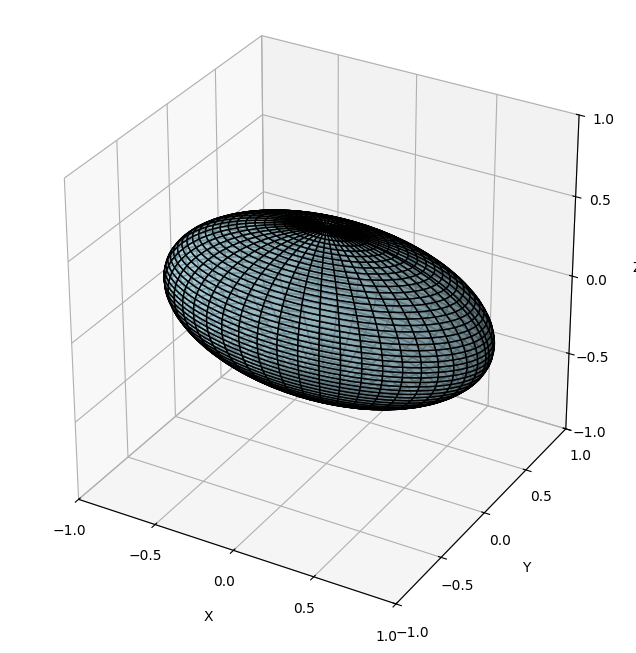

In [12]:
bit_flip_channel(0.5)

<a id='pf_chan'></a>
### Phase Flip Channel


Same environment as before $\rho_E = (1-p)  \ket{0}\bra{0} + p\ket{1}\bra{1}$ 
and for $U$ choose instead the controlled-$Z$ gate.

$$
U = I\otimes \ket{0}\bra{0} + Z\otimes \ket{1}\bra{1}
$$

tha induces a phase flip $\ket{1}_S \to -\ket{1}_S$ in the qubit system if the environment is in state $\ket{1}_E$

Now the Krauss operators are 

$$
E_0 = \sqrt{1-p}\, I ~~~~~,~~~~~E_1 = \sqrt{p}\, Z
$$


 The noisy channel leaves the system $S$ intact with probability $(1-p)$ and maps $\ket{0} \to \ket{0}$ $\ket{1} \to -\ket{1}$ with probability $p$ (T2 in the context of NMR)

\begin{align}
{\cal E}_{pf}(\rho_S) 
&= E_0 \, \rho_S \,E_0  + E_1 \, \rho_S\, E_1 \, \\   \rule{0mm}{6mm}
&= (1-p) I \, \rho_S \,I  + p  Z \, \rho_S\,   Z \, \\  \rule{0mm}{6mm}
 &=   (1-p) \frac{1}{2}(I + c_x\sigma_x + c_y\sigma_y+c_z\sigma_z)   + p \frac{1}{2}(I - c_x\sigma_x - c_y\sigma_y+c_z\sigma_z) \nonumber \\  \rule{0mm}{6mm}
 &=  \frac{1}{2} ( I + c_z \sigma_z + (1-2p)(c_x \sigma_x + c_y \sigma_y) )
\end{align}





In [15]:
import numpy as np
import matplotlib.pyplot as plt

def phase_flip_channel(p=0.8):
    """
    Plots a unit sphere in 3D with Y and Z scaled by factor p.
    Uses a cubic plotting box but fixed axis limits so squeezing is visible.
    Parameters:
        p (float): scaling factor for Y and Z axes
    """
    # Create spherical coordinates
    u = np.linspace(0, 2 * np.pi, 100); v = np.linspace(0, np.pi, 100)

    # Convert spherical to Cartesian, scaling Y and Z
    x = np.outer(np.cos(u), np.sin(v)) *p
    y = np.outer(np.sin(u), np.sin(v)) * p
    z = np.outer(np.ones_like(u), np.cos(v)) 

    # Plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, color='lightblue', edgecolor='k', alpha=0.7)

    # Labels
    ax.set_xlabel('X', labelpad=10)
    ax.set_ylabel('Y', labelpad=10)
    ax.set_zlabel('Z', labelpad=10)
    ax.set_title(f'Deformed state after a phase flip event with probability {p}')

    # Keep cubic box but set axis limits
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])  # fixed box range for Y
    ax.set_zlim([-1, 1])  # fixed box range for Z

    # Set ticks every 0.5
    ax.set_xticks(np.arange(-1, 1.5, 0.5))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))
    ax.set_zticks(np.arange(-1, 1.5, 0.5))

    plt.show()

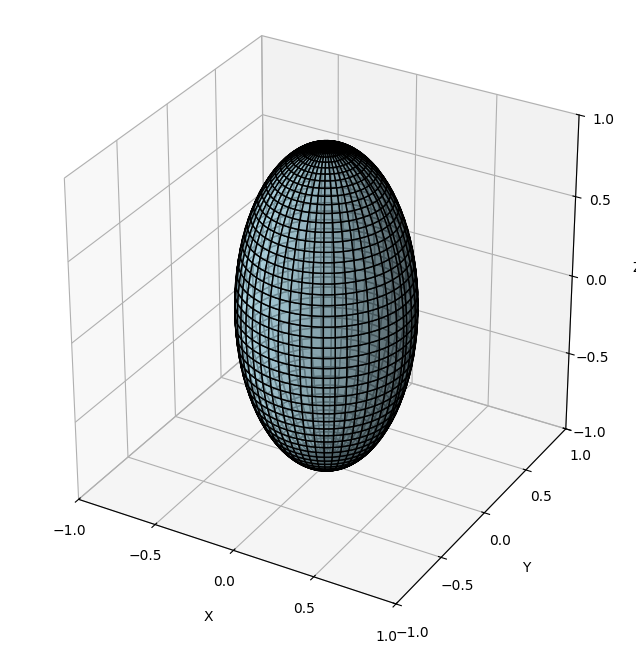

In [14]:
phase_flip_channel(0.5)

<a id='dep_chan'></a>
### Depolarizing channel

Here we will proceed backwards, by first defining the action of the channel.

The **depolarising**, or **maximally decohering** super-operator  maps $\rho_S$ to a *maximally mixed state* with probability  $p$  and leaves it intact with probability $(1-p)$. 

$$
{\cal E}_{dep}(\rho_S) = p \frac{I}{2} + (1-p) \rho_S  
$$





The effect on the Bloch sphere is easily seen
\begin{align}
{\cal E}_{dep}(\rho_S) &= p\frac{I}{2} + (1-p)\frac{1}{2} \big(I + \sum_k c_k \sigma_k \big) = \frac{1}{2} \left(I + (1-p)\sum_k c_k \sigma_k\right) \nonumber\\
& = \frac{1}{2} \left(I +  \sum_k c'_k \sigma_k\right)
\end{align}

hence it reduces *uniformly* the radius of the Block ball by a factor $c_k\to (1-p)c_k$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def depolarizing_channel(p=0.8):
    """
    Plots a unit sphere in 3D with Y and Z scaled by factor p.
    Uses a cubic plotting box but fixed axis limits so squeezing is visible.
    Parameters:
        p (float): scaling factor for Y and Z axes
    """
    # Create spherical coordinates
    u = np.linspace(0, 2 * np.pi, 100); v = np.linspace(0, np.pi, 100)

    # Convert spherical to Cartesian, scaling Y and Z
    x = np.outer(np.cos(u), np.sin(v)) *p
    y = np.outer(np.sin(u), np.sin(v)) * p
    z = np.outer(np.ones_like(u), np.cos(v)) *p 

    # Plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, color='lightblue', edgecolor='k', alpha=0.7)

    # Labels
    ax.set_xlabel('X', labelpad=10)
    ax.set_ylabel('Y', labelpad=10)
    ax.set_zlabel('Z', labelpad=10)
    ax.set_title(f'Deformed state after a depolarizing event with probability {p}')

    # Keep cubic box but set axis limits
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])  # fixed box range for Y
    ax.set_zlim([-1, 1])  # fixed box range for Z

    # Set ticks every 0.5
    ax.set_xticks(np.arange(-1, 1.5, 0.5))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))
    ax.set_zticks(np.arange(-1, 1.5, 0.5))

    plt.show()

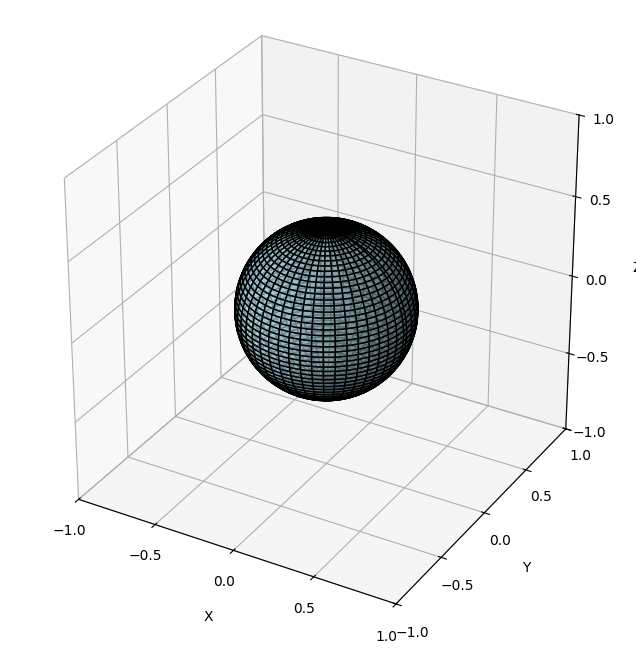

In [17]:
depolarizing_channel(0.5)

<a id='amp_chan'></a>
### Amplitude Damping Channel

In this noisy channel, the environment causes a qubit to decay $\ket{1}\to \ket{0}$ with probability $p$, (called $T_1$ in the context of NMR). 

The quantum operation is expressed in an OSR as followswith Krauss operators

$$
E_1 = \sqrt{p} \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}~~~~~; ~~~~~E_0 = \begin{pmatrix}  0 & 0 \\ 0 & \sqrt{1-p} \end{pmatrix} ~~\, .
$$

where $E_1$ is the decaying operator, and $E_0$ is fixed by demanding  $\sum_k E_kE_k^\dagger = I$.

$$
{\cal E}_{amp}(\rho_{S}) =  E_0 \rho_S E_0^\dagger + E_1 \rho_S E_1^\dagger  
$$ 




The effect on 
$$
\rho_S  = \begin{pmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{pmatrix}
=\frac{1}{2} 
\begin{pmatrix} 1 + c_z & c_x - i c_y \\ c_x + i c_y & 1-c_z \end{pmatrix}
$$

is 

\begin{align}
{\cal E}_{amp}(\rho_S) & = E_0 \rho_S E_0 + E_1\rho_s E_1 \\ \rule{0mm}{14mm}
 &= \begin{pmatrix} \rho_{00} + p \rho_{11} & \sqrt{1-p}\rho_{01}\\ 
 \sqrt{1-p}\rho_{10} & (1-p)\rho_{11} \end{pmatrix}\\ 
 \rule{0mm}{12mm}
&= \frac{1}{2}
 \begin{pmatrix} 1 + p +(1-p)c_z & \sqrt{1-p}(c_x-ic_z)\\ 
 \sqrt{1-p}(c_x+ic_z) & 1 - p + (1-p)c_z \end{pmatrix}
\\ \rule{0mm}{10mm}
& = \frac{1}{2}\left(  I  + (p+(1-p)c_z)\sigma_z + \sqrt{1-p}\, c_x \sigma_x + \sqrt{1-p}\,  c_y \sigma_y \right).
\end{align}



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def amplitude_damping_channel(p):
    """
    Plots a unit sphere in 3D with Y and Z scaled by factor p.
    Uses a cubic plotting box but fixed axis limits so squeezing is visible.
    Parameters:
        p (float): scaling factor for Y and Z axes
    """
    # Create spherical coordinates
    u = np.linspace(0, 2 * np.pi, 100); v = np.linspace(0, np.pi, 100)

    # Convert spherical to Cartesian, scaling Y and Z
    x = np.outer(np.cos(u), np.sin(v)) * np.sqrt(1-p)
    y = np.outer(np.sin(u), np.sin(v)) * np.sqrt(1-p)
    z = np.outer(np.ones_like(u), np.cos(v)) * (1-p) + p 

    # Plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, color='lightblue', edgecolor='k', alpha=0.7)

    # Labels
    ax.set_xlabel('X', labelpad=10)
    ax.set_ylabel('Y', labelpad=10)
    ax.set_zlabel('Z', labelpad=10)
    ax.set_title(f'Deformed state after a amplitude damping event with probability {p}')

    # Keep cubic box but set axis limits
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])  # fixed box range for Y
    ax.set_zlim([-1, 1])  # fixed box range for Z

    # Set ticks every 0.5
    ax.set_xticks(np.arange(-1, 1.5, 0.5))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))
    ax.set_zticks(np.arange(-1, 1.5, 0.5))

    plt.show()

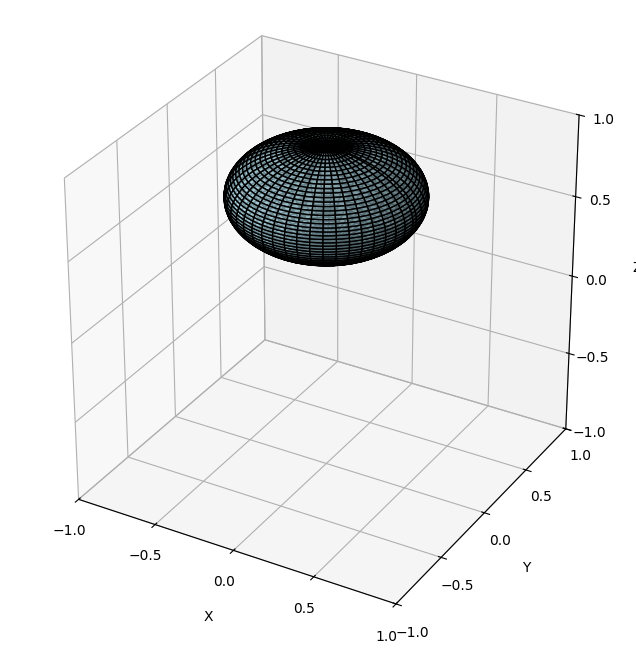

In [19]:
amplitude_damping_channel(p=0.7)

### The continuous limit

Let us find the **continuous evolution** $\rho(t)$ of a qubit submitted to the *amplitude damping channel*. 

For this let us rewrite   the effect of the quantum operation using $\rho_{00} = 1 - \rho_{11}$

$$
{\cal E}(\rho)  = \begin{pmatrix} 1 - (1-p)\rho_{11} & \sqrt{1-p}\rho_{01} \\
\sqrt{1-p}\rho_{10} & (1-p)\rho_{11}  \end{pmatrix}
$$

Remarkably this can be iterated  $n$ times to find

$$
{\cal E}^n(\rho)  = \begin{pmatrix} 1 - (1-p)^n\rho_{11} & (1-p)^{n/2}\rho_{01} \\
(1-p)^{n/2}\rho_{10} & (1-p)^n\rho_{11}  \end{pmatrix}
$$

Putting $p = \Gamma \Delta t$ with $\Delta t = t/n$ we get, in the limit $n\to \infty$

\begin{align}
\rho_S(t) = \lim_{n\to \infty} {\cal E}^n(\rho)  & =   \lim_{n\to \infty} \begin{pmatrix} 1 - (1-\frac{t \Gamma}{n})^n\rho_{11} & (1-\frac{t \Gamma}{n})^{n/2}\rho_{01} \\
(1-\frac{t \Gamma}{n})^{n/2}\rho_{10} & (1-\frac{t \Gamma}{n})^n\rho_{11}  \end{pmatrix} \\
\rule{0mm}{10mm}
&=
\begin{pmatrix} 1 - e^{-\Gamma t} \rho_{11} &  e^{-\Gamma t/2} \rho_{01} \\
e^{-\Gamma t/2}\rho_{10} & e^{-\Gamma t}\rho_{11}  \end{pmatrix}  ~~~\stackrel{t\to \infty}{\longrightarrow}
~~~ \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}
\end{align}

Asymptotically this channel leads to a pure state $\rho_S \to \ketbra{0}{0}$.

We observe 2 characteristic times

- $T_1 = 1/\Gamma$ is the *relaxation time* of the population of the excited level towards the ground state $\ket{0}$. 
<br>

- $T_2 = 2/{\Gamma} = 2Τ_1$ is the typical decoherence time where the coherences decrease by a factor of $e^{-1}$.




<a id='lindblad'></a>
# The Master Lindblad equation
[<<<](#top)

Let us derive a differential equation for the state evolution under the amplitude relaxation channel. Taking the time derivative we obtain

$$
\frac{d\rho}{dt} = \begin{pmatrix}\displaystyle \frac{d\rho_{00}}{dt} & \displaystyle \frac{d\rho_{01}}{dt} \\
\displaystyle \frac{d\rho_{10}}{dt} & \displaystyle \frac{d\rho_{11}}{dt} \end{pmatrix}
= \Gamma \begin{pmatrix} 1-\rho_{00}(t) & -\frac{1}{2}\rho_{01}(t) \\
-\frac{1}{2}\rho_{10}(t) & -\rho_{11}(t) \end{pmatrix}
$$

Let us find how to express this equation in term of the microscopic parameter $\Gamma$

To this end, we define the **jump operator**

$$
L = \sqrt{\Gamma}\, \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix} = \sqrt{\Gamma}\, \sigma_+
$$

then, a simple calculation allows to see that  the above differential equation is recovered from the following expression.

$$
\frac{d\rho}{dt} =  L\rho L^\dagger -\frac{1}{2}\{ L^t L,\rho\}
$$

<div class="alert alert-block alert-info">
<p style="text-align: left ;color: navy;">  <b>Theorem:</b> (Lindblad equation) 
<br>
<br>    
The time evolution of an open system is characterized by a Hamiltonian $H$ that governs the internal interactions, and a set of <i>jump operators</i> $L_k,\, k=1,2,...$ that inform about the possible external influences on the system. With this information the evolution of the state is governed by the Lindblad master equation
$$
\boxed{\frac{d\rho}{dt} = -\frac{i}{\hbar} [H, \rho] + L^\dagger \rho L - \frac{1}{2}\{L^\dagger L, \rho\}}
$$
</div>

Strictly speaking this equation holds in a limit called Markovian limit where the interaction with the environment is instantaneous and memory less. 

## Bloch equation in NMR

Let us consider a spin in an external magnetic field. The Hamiltonian is 
$$
H = -\frac{\omega_0}{2} \sigma
$$
with $\omega_0$ the usual Larmor frequency.

If the system is immerse in a cavity with a bath of photons, it may undergo a series of processes described by the jump operators

 - Relaxation $\ket{1}\to \ket{0}$ with probability per unit time $\Gamma_+$  by emission of a resonant photon of energy $E = \hbar \omega$  
 $$
 L_+ = \sqrt{\Gamma_+} \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}
 $$
 
 - Excitationn $\ket{0}\to \ket{1}$ with probability per unit time $\Gamma_-$  by absorbtion of a resonant photon of energy $E = \hbar \omega$ 
 $$
 L_+ = \sqrt{\Gamma_-} \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix}
 $$
 
 - Dephasing $\ket{1}\to -\ket{1}$ with probability per unit time $\Gamma_z$. 
 $$
 L_z = \sqrt{\Gamma_z} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
 $$
 

 

The Lindblad equation boils down to 

\begin{align}
\frac{d}{d t} 
\begin{pmatrix}  \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{pmatrix}
 = & ~~i\omega_0 \begin{pmatrix} 0 & \rho_{01} \\ - \rho_{10} & 0 \end{pmatrix}  + \Gamma_+
\begin{pmatrix} \rho_{11} & - \rho_{01}/2 \\ - \rho_{10}/2 & - \rho_{11} \end{pmatrix}  + \Gamma_- \begin{pmatrix} -\rho_{00} & - \rho_{01}/2 \\ - \rho_{10}/2 & \rho_{00} \end{pmatrix}  \nonumber\\
& + 
\Gamma_z \begin{pmatrix} 0 & -2 \rho_{01} \\ -2\rho_{10} & 0 \end{pmatrix} \nonumber
\end{align}



These are the so called Bloch equations


\begin{align}
\dot\rho_{00}(t) &= \Gamma_+ \rho_{11} - \Gamma_- \rho_{00} \nonumber\\ \rule{0mm}{8mm}
\dot\rho_{11}(t) &= - \Gamma_+ \rho_{11} + \Gamma_- \rho_{00} \nonumber\\  \rule{0mm}{8mm}
\dot\rho_{01}(t) &= \left( i\omega_0  - \left(\frac{\Gamma_+ + \Gamma_-}{2}+ 2\Gamma_z\right)\right) \rho_{01} \nonumber
\end{align}


The solution to the above equations is straightforward  

\begin{align}
\rho_{00}(t) &= \rho_{00}^{eq} + (\rho_{00}(0) - \rho_{00}^{eq})\,  e^{-t/T_1} \nonumber\\ \rule{0mm}{8mm}
\rho_{11}(t) &= \rho_{11}^{eq} + (\rho_{11}(0) - \rho_{11}^{eq})\,  e^{-t/T_1} \nonumber\\ \rule{0mm}{8mm}
\rho_{01}(t) &=  \rho_{01}(0)\, e^{(i\omega_0 - 1/T_2)t} \nonumber
\end{align}

As before, 

- the populations and coherences  decay with  characteristic times $T_1$ and  $T_2$ to some asymptotic values.

- meanwhile, the coherences oscillate at the Larmor frequency $\omega_0$. 


The decay times are governed by the jump operator amplitudes

$$
T_1 = \frac{1}{\Gamma_+ + \Gamma_-}~~~~,~~~~~T_2 = \frac{1}{\displaystyle\frac{\Gamma_+ + \Gamma_-}{2} + 2 \Gamma_z}  
$$




The limiting state is now a thermal Gibbs state which can be written as

$$
\rho^{eq} = \begin{pmatrix} \rho^{eq}_{00} & 0 \\ 0 & \rho^{eq}_{11} \end{pmatrix} = 
\frac{1}{Z}\begin{pmatrix} e^{+\omega_0/2k_B T} & 0 \\ 0 & e^{-\omega_0/2k_B T} \end{pmatrix}
$$
with $T$ the temperature of the system at equilibrium.
    
We can relate these populations to the coefficients $\Gamma_\pm$  by setting $\dot\rho_{00} = \dot\rho_{11} = 0$ in the Bloch equations.
<br>
<br>
$$
\frac{\rho_{11}^{eq}}{\rho_{00}^{eq}} = \frac{\Gamma_-}{\Gamma_+} = e^{-\omega_0/k_BT}  
$$



<div class="alert alert-block alert-danger">
<b>Note:</b> 
    
The rates of $\Gamma_+,\Gamma_-$ can be related to the mean density of photons of the required energy in the cavity
by setting
<br>
    
$$\Gamma_+ = \gamma[ 1 + n(\omega_0)]~~~~,~~~~ \Gamma_- = \gamma n(\omega_0)$$
 
which gives in turn 

$$
n(\omega_0) = \frac{1}{e^{\omega_0/k_B T} - 1}
$$

The temperature becomes  then observable through measuring the value of $T_1^{-1}$
    
$$
T_1^{-1} = \Gamma_+ + \Gamma_- = \coth \left( \frac{\omega_0}{2k_B T}\right)
$$

    
</div>